---
# <font color="#CA3532">Práctica 3 de Neurocomputación</font>
### Curso 2021-2022
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---

Fechas de entrega:
- Grupo 2462: lunes 16 de mayo de 2022
- Grupo 2461: martes 17 de mayo de 2022

---

Última actualización: 31-03-2022

---

*Sesión 1*:

- Esta práctica está centrada en [Keras](https://keras.io/).

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [1]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [{'nombre': 'Zhijie Qian', 'pareja': 'P05', 'grupo': '2461'},
               {'nombre': 'Santo Saenz Ferrero', 'pareja': 'P05', 'grupo': '2461'}]


### <font color="#CA3532">Importación de bibliotecas</font>

TensorFlow 2.0 incluye oficialmente Keras.

In [2]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

### <font color="#CA3532">Datos del problema</font>

El problema consiste en predecir si va a haber una erupción solar (*solar flares*) en ciertas regiones solares en función de las características de la región solar. El conjunto datos y la caracterización de sus atributos puede encontrarse en https://www.openml.org/d/40702. El siguiente fragmento de código permite cargar estos datos.

In [3]:
dataset_url = 'https://www.openml.org/data/get_csv/4965303/flare.arff' 

dataset = np.genfromtxt(dataset_url, delimiter=',', skip_header=1)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1]
x_size = x.shape[1]
y = dataset[:,-1]

In [4]:
# Resultados de la división y el número de atributos

print('Ejemplo 0:', x[0], y[1])
print('Atributos:', x_size)
print('Clases:', np.unique(y))
print('Recuento de clases:', y.tolist().count(0), y.tolist().count(1))
print('Examplos:', len(x))

Ejemplo 0: [5. 4. 3. 1. 3. 1. 1. 2. 1. 1.] 0.0
Atributos: 10
Clases: [0. 1.]
Recuento de clases: 884 182
Examplos: 1066


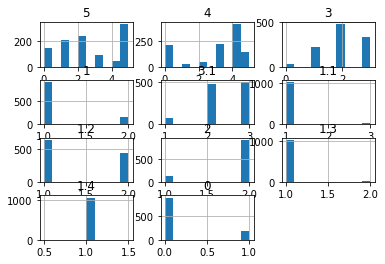

In [5]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# load the csv file as a data frame
df = read_csv(dataset_url, header=1)

# histograms of all variables 
df.hist()
pyplot.show()

In [6]:
print(df.head(5))

   5  4  3  1  3.1  1.1  1.2  2  1.3  1.4  0
0  1  3  1  1    2    1    1  2    1    1  0
1  2  3  2  1    3    1    1  2    1    1  1
2  5  4  3  2    2    1    2  2    1    1  0
3  1  4  2  1    3    1    1  2    1    1  0
4  1  4  2  1    2    1    2  2    1    1  0


In [7]:
print(df.describe())

                 5            4            3            1          3.1  \
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.000000   
mean      2.625352     2.957746     2.034742     1.153991     2.400939   
std       1.844397     1.703904     0.806293     0.361109     0.620604   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       1.000000     2.000000     2.000000     1.000000     2.000000   
50%       2.000000     4.000000     2.000000     1.000000     2.000000   
75%       5.000000     4.000000     3.000000     1.000000     3.000000   
max       5.000000     5.000000     3.000000     2.000000     3.000000   

               1.1          1.2            2          1.3     1.4            0  
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.0  1065.000000  
mean      1.059155     1.404695     1.875117     1.025352     1.0     0.170892  
std       0.320469     0.491063     0.330741     0.157266     0.0     0.376591  
min      

In [8]:
# Normalizad los datos (si es necesario)
# Los datos se encuentran en diferentes intervalos de valores por lo que el modelo puede tender 
# a ponderar más los datos con rangos de valores mayores, por ello se ha decidico escalar los 
# datos de la forma que se nos proporciona.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [9]:
print(x.shape)

(1066, 10)


### <font color="#CA3532">Definición del modelo</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.). 

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [10]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------
nn.add(Dense(12, activation="sigmoid"))
nn.add(Dense(12, activation="sigmoid"))
nn.add(Dense(1, activation="sigmoid"))

### <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. Aprende al menos el significado y las diferencias de las métricas *accuracy*, *precision*, *recall* y *AUC*. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [11]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------

metrics = [
            #keras.metrics.TruePositives(name='tp'),
            #keras.metrics.FalsePositives(name='fp'),
            #keras.metrics.TrueNegatives(name='tn'),
            #keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='Prec'),
            keras.metrics.Recall(name='Rec'),
            keras.metrics.AUC(name='AUC'),
            #keras.metrics.AUC(name='PRC', curve='PR'),
          ]

nn.compile(optimizer='SGD', loss="mse", metrics=metrics)
# nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

### <font color="#CA3532">Conjuntos de entrenamiento y validación</font>

Usaremos el 80 % de los datos para entrenamiento y el 20 % para validación. Usaremos también la técnica de muestreo estratificado (también están permitidas otras formas de validación). Averigua qué es y para qué sirve.

In [12]:
# Contrucción de los conjuntos de entrenamiento y validación

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2) 

In [13]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 707, 1.0: 145}

In [14]:
unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

{0.0: 177, 1.0: 37}

### Respuesta
A partir de la técnica de muestreo estratificado los datos se dividen por una característica común, en este caso por la clase objetivo, por ello los datos se obtienen en train y validación de forma equilibrada teniendo en ambos proporcion especificada por test_size para cada clase objetivo

Un ejemplo sería que si y tiene 20% de 0s y 80% de 1s, el ramdon split realizado también asegurá que haya 20% de 0s y 80% de 1s.

### <font color="#CA3532">Visualización de resultados</font>

Para la visualización de los resultados utilizaremos gráficas con la evolución de la función de pérdida y las métricas en cada época del entrenamiento, tanto para los datos de entrenamiento como para los de validación.

También obtendremos la matriz de confusión y alguna métricas sobre cada clase del problema. Observaremos especialmente la medida macro-F1.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()

### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

https://keras.io/api/models/model_training_apis/#fit-method

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________





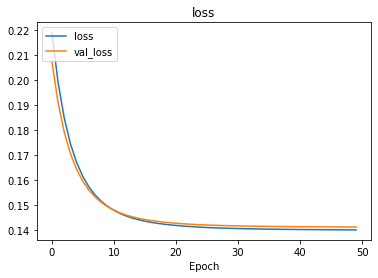

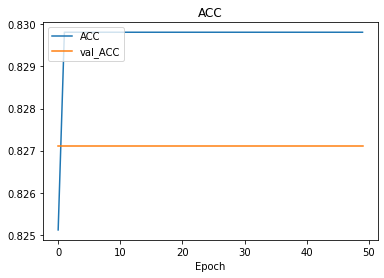

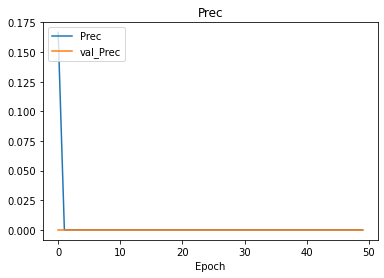

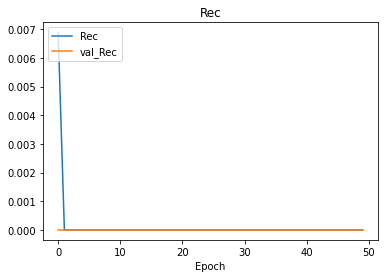

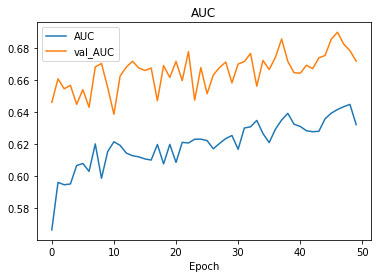

[[177   0]
 [ 37   0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       177
         1.0       0.00      0.00      0.00        37

    accuracy                           0.83       214
   macro avg       0.41      0.50      0.45       214
weighted avg       0.68      0.83      0.75       214



In [16]:
# Entrenamiento

epochs = 50

history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Predicciones del conjunto de evaluación

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

# Detalles de la red neuronal

nn.summary()
print('\n\n')

# Visualización de las métricas 

show_metrics(history)

# Matriz de confusión

print(confusion_matrix(y_val, y_pred))

# Observa la medida macro-f1 del siguiente informe

print(classification_report(y_val, y_pred, zero_division=0))


### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>
Como podrás haber observado en problema no está balanceado (o está bastante desequilibrado), porque el número de ejemplos de cada clase es muy diferente.

Existen varias técnicas para abortar este tipo de problemas. Una de ellas consiste seleccionar un subconjunto de datos equilibrados en el que las dos clases esten representadas en la misma proporción.


In [17]:
!pip3 install imbalanced-learn

In [18]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

### Separar datos para que haya misma clase de 0 y 1
El problema de esta técnica es que estamos desperdiciando los datos, ya que si existiese 1000 datos de clase 0 y 100 de calse 1, tendríamos que tirar 900 datos de clase 0 para poder equilibrarlo. Si llevamos esta situación al extremo como 10k datos de clase 0 y sólo 100 casos de clase 1, por ejemplo apareción de una nueva enfermedad donde sólo unas pocas personas los tiene, no podemos sólo tomar 100 pacientes sanas con 100 pacientes enfermas.

Para realizar esto, sólo vamos a despreciar los datos del training, para que se entrena de forma equilibrada y luego validamos el Test con el desequilibro de datos.

In [19]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = undersample.fit_resample(x_train, y_train)

In [20]:
print(Counter(y_under_train))

Counter({0.0: 145, 1.0: 145})


In [21]:
epochs = 50
history = nn.fit(X_under_train, y_under_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))
# La matriz de confusión en funcion del valor se le de a los pesos tiene una 
# precisión total para los registros de una clase y precisión nula para la otra clase

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       177
         1.0       0.50      0.08      0.14        37

    accuracy                           0.83       214
   macro avg       0.67      0.53      0.52       214
weighted avg       0.78      0.83      0.77    

#### Resultado
Esta vez, aunque la accuracy ha bajado bastante, pero conseguimos que la red pueda clasificar algunos datos de la clase 1.

### Aumentar los datos para que haya misma clase de 0 y 1
La técnica planteada es muy parecido al sección anterior, solo que en vez de reducir el dataset para que haya mismo número de 0s y 1s, vamos a aumentar la clase con menor dato para que sea más equilibrado. 

In [22]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over_train, y_over_train = oversample.fit_resample(x_train, y_train)

In [23]:
print(Counter(y_over_train))

Counter({0.0: 707, 1.0: 707})


In [24]:
epochs = 50
history = nn.fit(X_over_train, y_over_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))
# La matriz de confusión en funcion del valor se le de a los pesos tiene una 
# precisión total para los registros de una clase y precisión nula para la otra clase

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.92      0.64      0.76       177
         1.0       0.30      0.73      0.43        37

    accuracy                           0.66       214
   macro avg       0.61      0.69      0.59       214
weighted avg       0.81      0.66      0.70    

#### Resultado
Con esta ténica, volvamos a tener resultados parecidos, donde hemos conseguido mejorar f1-score de la clase 1.

### Uso de class_weight pero con paquete que nos proporciona

Otra técnica consiste en asignar un peso a cada clase para que lo tenga en cuenta en algoritmo de entrenamiento.
Aprende lo que hace el parámetro ```class_weight``` de ```fit``` (https://keras.io/api/models/model_training_apis/#fit-method) y explícalo.

Vuelve a entrenar considerando distintos pesos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [25]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)

{0: 0.6025459688826026, 1: 2.9379310344827587}


El modelo para el atributo class_weights lo que hace es mutiplicarlo por el error obtenido en la función de error dependiendo de la clase objetivo, con el fin de que el optimizador, al computar los errores de ciertas clases de forma mayor, tenderá a minimizar el error en esas clases si tienen un weight en class_weights alto.

In [26]:
epochs = 50

history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76       177
         1.0       0.30      0.73      0.43        37

    accuracy                           0.66       214
   macro avg       0.61      0.69      0.60       214
weighted avg       0.81      0.66      0.70    

#### Resultado
Esta vez, con el uso del método class_weight.compute_class_weight, nos permite ajutar mejor los pesos incrementando f1-score de clase 1, aunque el resultado producido es similar a las 2 técnicas que hemos aplicado anteriormente, pero no hemos tenido que eliminar información que puede ser relevante ni duplicar datos.

### Aplicar todas las ténicas a la vez.
La idea es que vamos a intentar reducir algunos datos de la clase mayoritaria pero no eliminar todas sino sólo algunas de ellas para no perder mucha información y vamos a ampliar datos de la clase minoritaria para compensar un poco.
Imagina que tenemos un desbalanceo de 1:100, aplicamos oversampling para tener un desbalanceo de 1:10 y luego aplicamos undersampling para eliminar dato y tener un desbalanceo de 1:2.

Finalmente, como seguimos teniendo un desbalanceo de datos, usamos class_weight para ajustar.

In [27]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.utils import class_weight

print(Counter(y_train))

oversample = RandomOverSampler(sampling_strategy=0.4)
X_over_train, y_over_train = oversample.fit_resample(x_train, y_train)
print(Counter(y_over_train))

undersample = RandomUnderSampler(sampling_strategy=0.5)
X_ajust_train, y_ajust_train = undersample.fit_resample(X_over_train, y_over_train)
print(Counter(y_ajust_train))


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_ajust_train), y=y_ajust_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)

Counter({0.0: 707, 1.0: 145})
Counter({0.0: 707, 1.0: 282})
Counter({0.0: 564, 1.0: 282})
{0: 0.75, 1: 1.5}


In [28]:
epochs = 50

history = nn.fit(X_ajust_train, y_ajust_train, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77       177
         1.0       0.31      0.73      0.44        37

    accuracy                           0.67       214
   macro avg       0.62      0.70      0.60       214
weighted avg       0.82      0.67      0.71    

### <font color="#CA3532">Optimización del diseño de la red neuronal</font>

- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadid más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.

- Utilizad ```tuner``` para la búsqueda de estos hiperparámetros (https://keras.io/keras_tuner/).


In [29]:
metrics = [keras.metrics.BinaryAccuracy(name='ACC')]
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [30]:
!pip3 install -U keras-tuner
import keras_tuner
from kerastuner.tuners import RandomSearch

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras as k
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import json

C:\Users\santo\AppData\Local\Temp/ipykernel_23860/338409175.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [31]:
x_train, y_train = X_ajust_train, y_ajust_train
def work(build_model, epochs=50):
  !rm -rf untitled_project/
  tuner = RandomSearch(build_model, objective='val_ACC', max_trials=1200, executions_per_trial=3)
  tuner.search_space_summary()
  tuner.search(x_train, y_train, epochs=epochs, class_weight=class_weights, validation_data=(x_val, y_val), verbose=0)
  tuner.results_summary()
  best_nn = tuner.get_best_models(num_models=1)
  y_pred = best_nn[0].predict(x_val)
  y_pred = y_pred > 0.5
  print(confusion_matrix(y_val, y_pred))
  print(classification_report(y_val, y_pred, zero_division=0))
  config = json.dumps(best_nn[0].get_config(), indent=2)
  print(config)

In [32]:
def build_model_binary_1(hp):
    nn = Sequential()
    nn.add(Dense(units=hp.Int(f"units", 1, 100), activation=hp.Choice(f"activations", ["relu", "tanh", 'sigmoid'])))
    nn.add(Dense(1, activation="sigmoid"))
    nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss=f1_loss, metrics=metrics)
    return nn

work(build_model_binary_1)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
activations (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 24
activations: sigmoid
learning_rate: 0.001
Score: 0.8302180568377177
Trial summary
Hyperparameters:
units: 72
activations: sigmoid
learning_rate: 0.0001
Score: 0.827102780342102
Trial summary
Hyperparameters:
units: 60
activations: relu
learning_rate: 0.01
Score: 0.822429895401001
Trial summary
Hyperparameters:
units: 8
activations: tanh
learning_rate: 0.01
Score: 0.8099688490231832
Trial summary

In [33]:
def build_model_binary_2(hp):
    nn = Sequential()
    nn.add(Dense(units=hp.Int(f"units_1", 1, 100), activation=hp.Choice(f"activation_1", ["relu", "tanh", 'sigmoid'])))
    nn.add(Dense(units=hp.Int(f"units_2", 1, 100), activation=hp.Choice(f"activation_2", ["relu", "tanh", 'sigmoid'])))
    nn.add(Dense(1, activation="sigmoid"))
    nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss="binary_crossentropy", metrics=metrics)
    return nn

work(build_model_binary_2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
activations (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 24
activations: sigmoid
learning_rate: 0.001
Score: 0.8302180568377177
Trial summary
Hyperparameters:
units: 72
activations: sigmoid
learning_rate: 0.0001
Score: 0.827102780342102
Trial summary
Hyperparameters:
units: 60
activations: relu
learning_rate: 0.01
Score: 0.822429895401001
Trial summary
Hyperparameters:
units: 8
activations: tanh
learning_rate: 0.01
Score: 0.8099688490231832
Trial summary

In [34]:
def build_model_binary_3(hp):
    nn = Sequential()
    nn.add(Dense(units=hp.Int(f"units_1", 1, 100), activation=hp.Choice(f"activation_1", ["relu", "tanh", 'sigmoid'])))
    nn.add(Dense(units=hp.Int(f"units_2", 1, 100), activation=hp.Choice(f"activation_2", ["relu", "tanh", 'sigmoid'])))
    nn.add(Dense(units=hp.Int(f"units_3", 1, 100), activation=hp.Choice(f"activation_3", ["relu", "tanh", 'sigmoid'])))
    nn.add(Dense(1, activation="sigmoid"))
    nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss="binary_crossentropy", metrics=metrics)
    return nn

work(build_model_binary_3)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
activations (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 24
activations: sigmoid
learning_rate: 0.001
Score: 0.8302180568377177
Trial summary
Hyperparameters:
units: 72
activations: sigmoid
learning_rate: 0.0001
Score: 0.827102780342102
Trial summary
Hyperparameters:
units: 60
activations: relu
learning_rate: 0.01
Score: 0.822429895401001
Trial summary
Hyperparameters:
units: 74
activations: sigmoid
learning_rate: 0.01
Score: 0.8099688490231832
Trial sum

### <font color="#CA3532">Diseño final de la red neuronal</font>
Define ahora tu modelo final y muestra los resultados de su evaluación.

In [35]:
### ---------------------------------------------------------------------------
### Modelo final y evaluación
### ---------------------------------------------------------------------------

nn_final = Sequential()
nn_final.add(Dense(x_size, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), metrics=[tf.keras.metrics.AUC(from_logits=True)], loss="mse")

nn_final.fit(x=x_train, y=y_train, epochs=epochs, class_weight=class_weights)
y_pred = nn_final.predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, zero_division=0))

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 0.2524 - auc: 0.5492
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2436 - auc: 0.6993
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2378 - auc: 0.7240
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2327 - auc: 0.7256
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.2281 - auc: 0.7228
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2233 - auc: 0.7142
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2195 - auc: 0.7214
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2159 - auc: 0.7229
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2133 - auc: 0.7296
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.2114 - auc: 0.7230
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - lo